<a href="https://colab.research.google.com/github/shemabethapudi2/SE-lab-2/blob/main/SE_lab_4(18_12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#generate synthetic weather data
np.random.seed(42)
x = np.linspace(0,365,365)
y = 0.01 * x**2 -0.3 * x + 20 + np.random.normal(0,5,365)

#Normalize x
x_normalized = (x-np.mean(x))/np.std(x)

In [3]:
#Initialize parameters
a, b, c= 0.0, 0.0, 0.0
learning_rate = 1e-4
iterations = 10000
lambda_reg = 0.01

In [4]:
n = len(y)

#Gradient Descent Loop
cost_history = []
for i in range(iterations):
    y_pred = a + b * x_normalized**2 + b * x_normalized + c
    error = y - y_pred

    #Compute gradients
    a_grad = (-2/n) * np.sum(x_normalized**2 * error) + 2 * lambda_reg * a
    b_grad = (-2/n) * np.sum(x_normalized * error) + 2 * lambda_reg * b
    c_grad = (-2/n) * np.sum(error)+ 2 * lambda_reg * c

    #Update parameters
    a -= learning_rate * a_grad
    b -= learning_rate * b_grad
    c -= learning_rate * c_grad

Final parameters: a = -32.1754, b = 304.2182, c = 109.1592


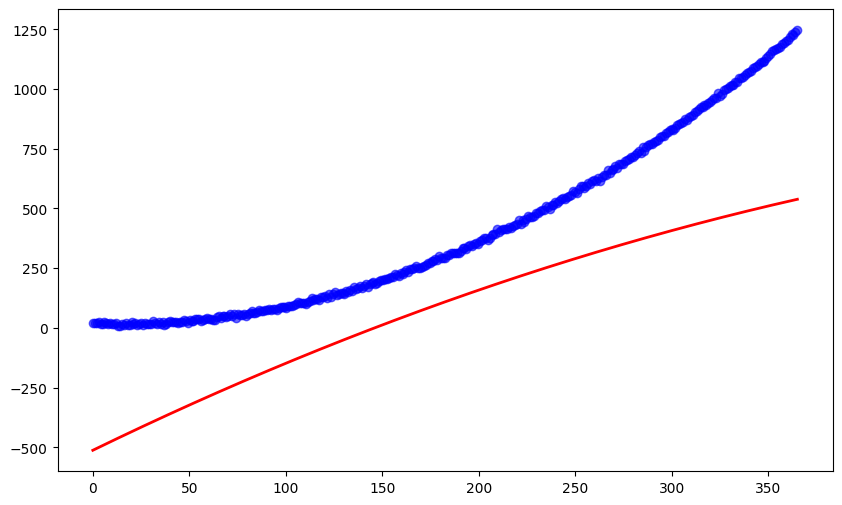

In [5]:
#Compute cost
cost = np.mean(error**2) + lambda_reg * (a**2 + b**2 + c**2)
cost_history.append(cost)

#Print progress every 1000 iterations
if i % 1000 == 0:
    print(f"Iteration {i}: Cost = {cost}")

#Final parameters
print(f"Final parameters: a = {a:.4f}, b = {b:.4f}, c = {c:.4f}")

#Generate predictions using the final model
y_final_pred = a * x_normalized**2 + b * x_normalized + c

plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Actual Data', alpha=0.6, color='blue')
plt.plot(x, y_final_pred, label='Quadratic Fit', color='red', linewidth=2)